In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
from PIL import Image # (pip install Pillow)


import os
from imutils import paths

# PATH="/content/drive/My Drive/dataset_binary/dataset_binary/"
basepath='/content/drive/My Drive/binaug_cervic_validation3/'
folderpath= basepath+'binary/'
folderpathorg = basepath+ 'original/'

# imagePaths = list(paths.list_images(folderpath))


class_names=[]
filenames1=[]
filenames=[]
mask_images=[]

for dirname in os.listdir(folderpath):
        class_names.append(dirname)
        print(dirname)
        path1=folderpath+dirname+'/'
        print(path1)
        for filename in os.listdir(path1):
            
            print(path1+filename)
            img= Image.open(path1+filename)
            mask_images.append(img)
            filenames1.append(dirname+'/'+filename)
            orgfilename=filename.replace('.bmp','.BMP')
            filenames.append(folderpathorg+dirname+'/'+orgfilename)

 

normal
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/157267647-157267732-001_0_4770.bmp
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/157227058-157227087-001_0_3947.bmp
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/157268342-157268376-001_0_973.bmp
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/157224504-157224520-001_0_2093.bmp
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/157224172-157224207-003_0_4661.bmp
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/157227058-157227087-001_0_3938.bmp
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/209565409-209565466-001_0_6598.bmp
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/157227461-157227503-002_0_6598.bmp
/content/drive/My Drive/binaug_cervic_validation3/binary/normal/157224172-157224207-001_0_2672.bmp
/content/drive/My Drive/binaug_cervic_

In [0]:
!pip install Shapely


In [0]:
import numpy as np                                 # (pip install numpy)
from skimage import measure                        # (pip install scikit-image)
from shapely.geometry import Polygon, MultiPolygon # (pip install Shapely)

def create_sub_mask_annotation(sub_mask, image_id, category_id, annotation_id, is_crowd):
    # Find contours (boundary lines) around each sub-mask
    # Note: there could be multiple contours if the object
    # is partially occluded. (E.g. an elephant behind a tree)
    contours = measure.find_contours(sub_mask, 0.5, positive_orientation='low')

    segmentations = []
    polygons = []
    large=0
    for contour in contours:
        if large<len(contour):
            large=len(contour)

    print('large :'+ str(large))
    for contour in contours:
        if len(contour)==large :
            
            for i in range(len(contour)):
                row, col = contour[i]
                contour[i] = (col - 1, row - 1)

        
            poly = Polygon(contour)
            #print(poly)

            poly = poly.simplify(1.0, preserve_topology=False)
            polygons.append(poly)
    
            #segmentation = np.array(poly.interiors).ravel().tolist()

            segmentation = np.array(poly.exterior.coords).ravel().tolist()
            segmentations.append(segmentation)

        else:
            continue
    
    multi_poly = MultiPolygon(polygons)
  #     print(multi_poly)
    x, y, max_x, max_y = multi_poly.bounds
    width = max_x - x
    height = max_y - y
    bbox = (x, y, width, height)
    area = multi_poly.area
      
    annotation = {
                    
                                  
                                        'segmentation': segmentations,
                                        'area': area, 
                                        'iscrowd': is_crowd,
                                        'image_id':image_id,
                                        'bbox': bbox,
                                        'category_id':category_id, 
                                        'annotation_id': annotation_id
                                    
                  
                  }


    return annotation

In [0]:

def create_sub_masks(mask_image):
    width, height = mask_image.size
    #print(mask_image.size)
    #print(width)
    #print(height)
    # Initialize a dictionary of sub-masks indexed by RGB colors
    sub_masks = {}
    for x in range(width):
        for y in range(height):
            # Get the RGB values of the pixel
            #pixel = mask_image.getpixel((x,y))[:3]
            pixel = mask_image.getpixel((x,y))
            #print(pixel)
            # If the pixel is not black...
            if pixel != (0):
                # Check to see if we've created a sub-mask...
                pixel_str = str(pixel)
                sub_mask = sub_masks.get(pixel_str)
                if sub_mask is None:
                   # Create a sub-mask (one bit per pixel) and add to the dictionary
                    # Note: we add 1 pixel of padding in each direction
                    # because the contours module doesn't handle cases
                    # where pixels bleed to the edge of the image
                    sub_masks[pixel_str] = Image.new('1', (width+2, height+2))

                # Set the pixel value to 1 (default is 0), accounting for padding
                sub_masks[pixel_str].putpixel((x+1, y+1), 1)

    return sub_masks, width, height

In [0]:

def create_image(mask_image, filename1,width1, height1, image_id):
    image_det=                  {
                                     'licence':0,
                                     'filename':filename1 , 
                                     'width':width1 , 
                                     'height':height1,
                                     'id':image_id 
                                }       
                
    return image_det 

In [34]:
print(class_names)    

print(filenames)


['normal', 'abnormal']
['/content/drive/My Drive/binaug_cervic_validation3/original/normal/157267647-157267732-001_0_4770.BMP', '/content/drive/My Drive/binaug_cervic_validation3/original/normal/157227058-157227087-001_0_3947.BMP', '/content/drive/My Drive/binaug_cervic_validation3/original/normal/157268342-157268376-001_0_973.BMP', '/content/drive/My Drive/binaug_cervic_validation3/original/normal/157224504-157224520-001_0_2093.BMP', '/content/drive/My Drive/binaug_cervic_validation3/original/normal/157224172-157224207-003_0_4661.BMP', '/content/drive/My Drive/binaug_cervic_validation3/original/normal/157227058-157227087-001_0_3938.BMP', '/content/drive/My Drive/binaug_cervic_validation3/original/normal/209565409-209565466-001_0_6598.BMP', '/content/drive/My Drive/binaug_cervic_validation3/original/normal/157227461-157227503-002_0_6598.BMP', '/content/drive/My Drive/binaug_cervic_validation3/original/normal/157224172-157224207-001_0_2672.BMP', '/content/drive/My Drive/binaug_cervic_va

In [0]:
# print(len(filenames1))  

In [0]:
def category_find(class_name):

        switcher =    {
                        'normal': 1,
                        'abnormal': 2
                                     }
        return switcher.get(class_name)

In [36]:
imgannotations = []
fileid=0



categ=[]
# Create the annotations
annotations = []
annotation_id = 1
image_id = 1
is_crowd = 0
fileid=0

     
for (mask_image, classname) in zip(mask_images, filenames1):
    #print('loop')
    classname1= classname.split('/')[0]
    print(classname.split('/')[0])
    print('image_id :'+ str(image_id))
    category_id1= category_find(classname1)
    category={'supercategory':'cervic', 'category_id': category_id1, 'name': classname.split('/')[0]}
    categ.append(category)
#     imglist=[9,43,55,60,76,77,80,88]
         
    imglist=[]
    if image_id not in imglist :
        
        sub_masks, width, height = create_sub_masks(mask_image)
        for color, sub_mask in sub_masks.items():
            #category_id = category_ids[image_id][color]
            
            #category_id.append(cat_id)
            annot= create_image(sub_mask, filenames[fileid],width, height, image_id)
            imgannotations.append(annot)
            #width, height = mask_image.size
            print(filenames[fileid])
            annotation = create_sub_mask_annotation(sub_mask, image_id, category_id1, annotation_id, is_crowd )
            if annotation!=0:
              annotations.append(annotation)

            annotation_id = 1
   # elif image_id==16:
   #     continue
    image_id += 1
    fileid +=1
#print(json.dumps(annotations))

import json


# category_id = 2
# class_name= 'light_dysplastic'
image_info = {

                    'info': 
                              {
                                    "description": "cervic class 7 Dataset",
                                    "url": "http://cocodataset.org",
                                    "version": "1.0",
                                    "year": 2019,
                                    "contributor": "Trois Infotech",
                                    "date_created": "2019/12/30"
                               },
                    'licenses':  
                                 {
                                    "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/",
                                    "id": 0,
                                    "name": "Attribution-NonCommercial-ShareAlike License"
                                 },
                    'categories':categ, 
                                
                    'images': imgannotations,
                    'annotations': annotations
                                  
}


with open('/content/drive/My Drive/binaug_cervic_validation3/cervic_binaryaug_class_validation2.json', 'w') as json_file:
 
        json.dump(image_info, json_file)
#         json.dump(annotations1, json_file)
#         json.dump(annotations, json_file)

normal
image_id :1
/content/drive/My Drive/binaug_cervic_validation3/original/normal/157267647-157267732-001_0_4770.BMP
large :1181
normal
image_id :2
/content/drive/My Drive/binaug_cervic_validation3/original/normal/157227058-157227087-001_0_3947.BMP
large :343
normal
image_id :3
/content/drive/My Drive/binaug_cervic_validation3/original/normal/157268342-157268376-001_0_973.BMP
large :1125
normal
image_id :4
/content/drive/My Drive/binaug_cervic_validation3/original/normal/157224504-157224520-001_0_2093.BMP
large :1271
normal
image_id :5
/content/drive/My Drive/binaug_cervic_validation3/original/normal/157224172-157224207-003_0_4661.BMP
large :303
normal
image_id :6
/content/drive/My Drive/binaug_cervic_validation3/original/normal/157227058-157227087-001_0_3938.BMP
large :235
normal
image_id :7
/content/drive/My Drive/binaug_cervic_validation3/original/normal/209565409-209565466-001_0_6598.BMP
large :1417
normal
image_id :8
/content/drive/My Drive/binaug_cervic_validation3/original/no

In [0]:
import IPython
import os
import json
import random
import numpy as np
import requests
from io import BytesIO
from math import trunc
from PIL import Image as PILImage
from PIL import ImageDraw as PILImageDraw

In [0]:
# Load the dataset json
class CocoDataset():
    def __init__(self, annotation_path, image_dir):
        self.annotation_path = annotation_path
        self.image_dir = image_dir
        self.colors = colors = ['blue','red','gold','green','purple',   'orange', 'salmon', 'pink', 
                                'orchid', 'slateblue', 'limegreen', 'seagreen', 'darkgreen', 'olive',
                               'teal', 'aquamarine', 'steelblue', 'powderblue', 'dodgerblue', 'navy',
                               'magenta', 'sienna', 'maroon']
        
        json_file = open(self.annotation_path)
        self.coco = json.load(json_file)
        json_file.close()
        
        self.process_info()
        self.process_licenses()
        self.process_categories()
        self.process_images()
        self.process_segmentations()
            
        
    def display_info(self):
        print('Dataset Info:')
        print('=============')
        for key, item in self.info.items():
            print('  {}: {}'.format(key, item))
        
        requirements = [['description', str],
                        ['url', str],
                        ['version', str],
                        ['year', int],
                        ['contributor', str],
                        ['date_created', str]]
        for req, req_type in requirements:
            if req not in self.info:
                print('ERROR: {} is missing'.format(req))
            elif type(self.info[req]) != req_type:
                print('ERROR: {} should be type {}'.format(req, str(req_type)))
        print('')

        
    def display_licenses(self):
        print('Licenses:')
        print('=========')
        
        requirements = [['id', int],
                        ['url', str],
                         ['name', str]]
        for license in self.licenses:
#             for key, item in license.items():
#                 print('  {}: {}'.format(key, item))
            for req, req_type in requirements:
                if req not in license:
                    print('ERROR: {} is missing'.format(req))
                elif type(license[req]) != req_type:
                    print('ERROR: {} should be type {}'.format(req, str(req_type)))
            print('')
        print('')
        
    def display_categories(self):
        print('Categories:')
        print('=========')
        for sc_key, sc_val in self.super_categories.items():
            print('  super_category: {}'.format(sc_key))
            for cat_id in sc_val:
                print('    id {}: {}'.format(cat_id, self.categories[cat_id]['name']))
            print('')
    
    def display_image(self, image_id, show_polys=True, show_bbox=True, show_crowds=True, use_url=False):
        print('Image:')
        print('======')
        if image_id == 'random':
            image_id = random.choice(list(self.images.keys()))
        
        # Print the image info
        image = self.images[image_id]
        for key, val in image.items():
            print('  {}: {}'.format(key, val))
            
        # Open the image
        if use_url:
            image_path = image['coco_url']
            response = requests.get(image_path)
            image = PILImage.open(BytesIO(response.content))
            
        else:
#             image_path = os.path.join(self.image_dir, image['filename'])
            image_path= image['filename']
            image = PILImage.open(image_path)
        
        # Calculate the size and adjusted display size
        max_width = 600
        image_width, image_height = image.size
        adjusted_width = min(image_width, max_width)
        adjusted_ratio = adjusted_width / image_width
        adjusted_height = adjusted_ratio * image_height
        
        # Create list of polygons to be drawn
        polygons = {}
        bbox_polygons = {}
        rle_regions = {}
        poly_colors = {}
        print('  segmentations ({}):'.format(len(self.segmentations[image_id])))
        for i, segm in enumerate(self.segmentations[image_id]):
            polygons_list = []
            if segm['iscrowd'] != 0:
                # Gotta decode the RLE
                px = 0
                x, y = 0, 0
                rle_list = []
                for j, counts in enumerate(segm['segmentation']['counts']):
                    if j % 2 == 0:
                        # Empty pixels
                        px += counts
                    else:
                        # Need to draw on these pixels, since we are drawing in vector form,
                        # we need to draw horizontal lines on the image
                        x_start = trunc(trunc(px / image_height) * adjusted_ratio)
                        y_start = trunc(px % image_height * adjusted_ratio)
                        px += counts
                        x_end = trunc(trunc(px / image_height) * adjusted_ratio)
                        y_end = trunc(px % image_height * adjusted_ratio)
                        if x_end == x_start:
                            # This is only on one line
                            rle_list.append({'x': x_start, 'y': y_start, 'width': 1 , 'height': (y_end - y_start)})
                        if x_end > x_start:
                            # This spans more than one line
                            # Insert top line first
                            rle_list.append({'x': x_start, 'y': y_start, 'width': 1, 'height': (image_height - y_start)})
                            
                            # Insert middle lines if needed
                            lines_spanned = x_end - x_start + 1 # total number of lines spanned
                            full_lines_to_insert = lines_spanned - 2
                            if full_lines_to_insert > 0:
                                full_lines_to_insert = trunc(full_lines_to_insert * adjusted_ratio)
                                rle_list.append({'x': (x_start + 1), 'y': 0, 'width': full_lines_to_insert, 'height': image_height})
                                
                            # Insert bottom line
                            rle_list.append({'x': x_end, 'y': 0, 'width': 1, 'height': y_end})
                if len(rle_list) > 0:
                    rle_regions[segm['id']] = rle_list  
            else:
                # Add the polygon segmentation
                for segmentation_points in segm['segmentation']:
                    segmentation_points = np.multiply(segmentation_points, adjusted_ratio).astype(int)
                    polygons_list.append(str(segmentation_points).lstrip('[').rstrip(']'))
            polygons[segm['image_id']] = polygons_list
            if i < len(self.colors):
                poly_colors[segm['image_id']] = self.colors[i]
            else:
                poly_colors[segm['image_id']] = 'white'
            
            bbox = segm['bbox']
            bbox_points = [bbox[0], bbox[1], bbox[0] + bbox[2], bbox[1],
                           bbox[0] + bbox[2], bbox[1] + bbox[3], bbox[0], bbox[1] + bbox[3],
                           bbox[0], bbox[1]]
            bbox_points = np.multiply(bbox_points, adjusted_ratio).astype(int)
            bbox_polygons[segm['image_id']] = str(bbox_points).lstrip('[').rstrip(']')
            
            # Print details
            print('    {}:{}:{}'.format(segm['image_id'], poly_colors[segm['image_id']], self.categories[segm['category_id']]))
        
        
        
        # Draw segmentation polygons on image
        html  = '<div class="container" style="position:relative;">'
        html += '<img src="{}" style="position:relative;top:0px;left:0px;width:{}px;">'.format(image_path, adjusted_width)
        html += '<div class="svgclass"><svg width="{}" height="{}">'.format(adjusted_width, adjusted_height)
        
        if show_polys:
            for seg_id, points_list in polygons.items():
                fill_color = poly_colors[seg_id]
                stroke_color = poly_colors[seg_id]
                for points in points_list:
                    html += '<polygon points="{}" style="fill:{}; stroke:{}; stroke-width:1; fill-opacity:0.5" />'.format(points, fill_color, stroke_color)
        
        if show_crowds:
            for seg_id, rect_list in rle_regions.items():
                fill_color = poly_colors[seg_id]
                stroke_color = poly_colors[seg_id]
                for rect_def in rect_list:
                    x, y = rect_def['x'], rect_def['y']
                    w, h = rect_def['width'], rect_def['height']
                    html += '<rect x="{}" y="{}" width="{}" height="{}" style="fill:{}; stroke:{}; stroke-width:1; fill-opacity:0.5; stroke-opacity:0.5" />'.format(x, y, w, h, fill_color, stroke_color)
            
        if show_bbox:
            for seg_id, points in bbox_polygons.items():
                fill_color = poly_colors[seg_id]
                stroke_color = poly_colors[seg_id]
                html += '<polygon points="{}" style="fill:{}; stroke:{}; stroke-width:1; fill-opacity:0" />'.format(points, fill_color, stroke_color)
                
        html += '</svg></div>'
        html += '</div>'
        html += '<style>'
        html += '.svgclass { position:absolute; top:0px; left:0px;}'
        html += '</style>'
        return html
       
    def process_info(self):
        self.info = self.coco['info']
    
    def process_licenses(self):
        self.licenses = self.coco['licenses']
    
    def process_categories(self):
        self.categories = {}
        self.super_categories = {}
        for category in self.coco['categories']:
            cat_id = category['category_id']
            #cat_id = 1
            super_category = category['supercategory']
            #super_category = 1
            # Add category to the categories dict
            if cat_id not in self.categories:
                self.categories[cat_id] = category
            else:
                print("ERROR: Skipping duplicate category id: {}".format(category))

            # Add category to super_categories dict
            if super_category not in self.super_categories:
                self.super_categories[super_category] = {cat_id} # Create a new set with the category id
            else:
                self.super_categories[super_category] |= {cat_id} # Add category id to the set
                
    def process_images(self):
        self.images = {}
        for image in self.coco['images']:
            image_id = image['id']
            if image_id in self.images:
                print("ERROR: Skipping duplicate image id: {}".format(image))
            else:
                self.images[image_id] = image
                
    def process_segmentations(self):
        self.segmentations = {}
        for segmentation in self.coco['annotations']:
            image_id = segmentation['image_id']
            if image_id not in self.segmentations:
                self.segmentations[image_id] = []
            self.segmentations[image_id].append(segmentation)

In [39]:
annotation_path = '/content/drive/My Drive/binaug_cervic_validation3/cervic_binaryaug_class_validation2.json'
image_dir = '/content/drive/My Drive/binaug_cervic_validation3/original/abnormal'

coco_dataset = CocoDataset(annotation_path, image_dir)
# coco_dataset.display_info()
# coco_dataset.display_licenses()
coco_dataset.display_categories()

ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}
ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}
ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}
ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}
ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}
ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}
ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}
ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}
ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}
ERROR: Skipping duplicate category id: {'supercategory': 'cervic', 'categ

In [40]:

html = coco_dataset.display_image(101, use_url=False)
IPython.display.HTML(html)

Image:
  licence: 0
  filename: /content/drive/My Drive/binaug_cervic_validation3/original/normal/157185781-157185814-002_0_2672.BMP
  width: 146
  height: 151
  id: 101
  segmentations (1):
    101:blue:{'supercategory': 'cervic', 'category_id': 1, 'name': 'normal'}


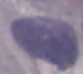

In [53]:
file1= '/content/drive/My Drive/binaug_cervic_validation3/original/abnormal/149315775-149315790-001.BMP'
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread(file1)
cv2_imshow(img)

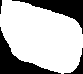

In [55]:
file1= '/content/drive/My Drive/binaug_cervic_validation3/binary/abnormal/149315775-149315790-001.bmp'
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread(file1)
cv2_imshow(img)

In [41]:
html = coco_dataset.display_image(1100, use_url=False)
IPython.display.HTML(html)

Image:
  licence: 0
  filename: /content/drive/My Drive/binaug_cervic_validation3/original/abnormal/149315775-149315790-001.BMP
  width: 83
  height: 74
  id: 1100
  segmentations (1):
    1100:blue:{'supercategory': 'cervic', 'category_id': 2, 'name': 'abnormal'}


In [42]:
annotation_path='/content/drive/My Drive/binaug_cervic_validation3/cervic_binaryaug_class_validation2.json'
with open(annotation_path) as json_file:
    lines = json_file.readlines()
for line in lines:
    print(line)

{"info": {"description": "cervic class 7 Dataset", "url": "http://cocodataset.org", "version": "1.0", "year": 2019, "contributor": "Trois Infotech", "date_created": "2019/12/30"}, "licenses": {"url": "http://creativecommons.org/licenses/by-nc-sa/2.0/", "id": 0, "name": "Attribution-NonCommercial-ShareAlike License"}, "categories": [{"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory": "cervic", "category_id": 1, "name": "normal"}, {"supercategory"